<p><b><u>Character recognition using CNN </u></b></p>

In [1]:
import tensorflow 
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt
plt.style.use('dark_background')

## Dataset
   <a href="https://www.nist.gov/itl/products-and-services/emnist-dataset"> EMNIST dataset </a>
                       
    - EMNIST Letters: 145,600 samples. 26 balanced classes

In [2]:
# 1 loading data
train_data = pd.read_csv('data/emnist-letters-train.csv',header=None)
train_data.shape

(88800, 785)

In [3]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Dataset preps

### Slicing data set into data and labels

In [4]:
x = np.array(train_data.iloc[:,1:].values)
y = np.array(train_data.iloc[:,0].values)
y = y-1
x.shape, y.shape

((88800, 784), (88800,))

### Loading actual label

In [5]:
label_data = pd.read_csv("data/emnist-balanced-mapping.txt",delimiter = ' ',header=None)
label_data.head()

,0,1,2
0,1,65,97
1,2,66,98
2,3,67,99
3,4,68,100
4,5,69,101


In [6]:
labels_dict = dict()
for i in range(label_data.shape[0]):
    labels_dict[i] = label_data.loc[i][1]
labels_dict

{0: 65,
 1: 66,
 2: 67,
 3: 68,
 4: 69,
 5: 70,
 6: 71,
 7: 72,
 8: 73,
 9: 74,
 10: 75,
 11: 76,
 12: 77,
 13: 78,
 14: 79,
 15: 80,
 16: 81,
 17: 82,
 18: 83,
 19: 84,
 20: 85,
 21: 86,
 22: 87,
 23: 88,
 24: 89,
 25: 90}

### Sample image and preprocessing 

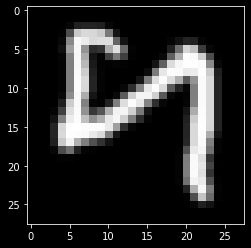

'Z'

In [7]:
plt.imshow(x[199].reshape(28, 28), cmap=plt.cm.gray)
plt.show()
chr(labels_dict[y[199]])

    - rotate image by 90deg

In [8]:
def rotate(image):
    image = image.reshape(28, 28)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image
x = np.apply_along_axis(rotate, 1, x)

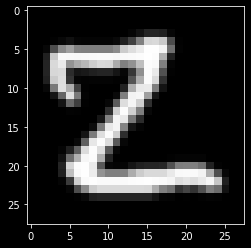

'Z'

In [9]:
plt.imshow(x[199], cmap=plt.cm.gray)
plt.show()
chr(labels_dict[y[199]])

    - (0,1) normalization
    - Reshape to 28x28x1

In [10]:
x = x/255.0
x = x.reshape(-1,28,28,1)

 ## Data spread 

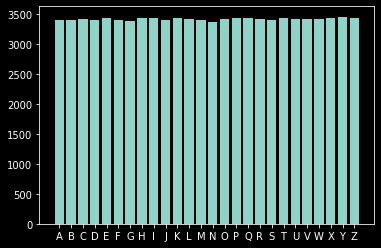

In [11]:
count = dict()
unique, counts = np.unique(y, return_counts=True)
for i,j in zip(unique, counts):
    count[chr(labels_dict[i])] = j
plt.bar(*zip(*count.items()))
plt.show()

## Neural Net

In [12]:
y = to_categorical(y, 26)

In [13]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(26,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          4624      
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [20]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [21]:
model_cnn = model.fit(x,y,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
555/555 [==============================] - 15s 17ms/step - loss: 0.6633 - accuracy: 0.7976 - val_loss: 0.3553 - val_accuracy: 0.8879
Epoch 2/10
555/555 [==============================] - 9s 16ms/step - loss: 0.2850 - accuracy: 0.9072 - val_loss: 0.2719 - val_accuracy: 0.9147
Epoch 3/10
555/555 [==============================] - 9s 16ms/step - loss: 0.2206 - accuracy: 0.9250 - val_loss: 0.2496 - val_accuracy: 0.9211
Epoch 4/10
555/555 [==============================] - 9s 16ms/step - loss: 0.1884 - accuracy: 0.9341 - val_loss: 0.2308 - val_accuracy: 0.9263
Epoch 5/10
555/555 [==============================] - 9s 17ms/step - loss: 0.1641 - accuracy: 0.9419 - val_loss: 0.2349 - val_accuracy: 0.9302
Epoch 6/10
555/555 [==============================] - 9s 16ms/step - loss: 0.1467 - accuracy: 0.9468 - val_loss: 0.2378 - val_accuracy: 0.9273
Epoch 7/10
555/555 [==============================] - 9s 16ms/step - loss: 0.1318 - accuracy: 0.9507 - val_loss: 0.2311 - val_accuracy: 0.933

In [16]:
#model.save('char_model.h5')

## Testing

In [22]:
from tensorflow.keras.models import load_model
cnn = load_model('char_model.h5')

### from test data

In [23]:
test_data = pd.read_csv('data/emnist-letters-test.csv',header=None)
test_data.shape
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
x_test = np.array(train_data.iloc[:,1:].values)
y_test = np.array(train_data.iloc[:,0].values)
y_test = y_test-1
x_test.shape, y_test.shape

((88800, 784), (88800,))

### Spread in test data

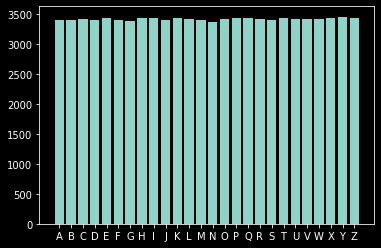

In [25]:
count1 = dict()
unique, counts = np.unique(y_test, return_counts=True)
for i,j in zip(unique, counts):
    count1[chr(labels_dict[i])] = j
plt.bar(*zip(*count1.items()))
plt.show()

In [26]:
x_test = np.apply_along_axis(rotate, 1, x_test)
x_test = x_test/255.0
x_test = x_test.reshape(-1,28,28,1)

In [27]:
preditctions = cnn.predict(x_test)

In [28]:
result = np.argmax(preditctions,axis=1) 

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix 

In [30]:
accuracy_score(y_test,result)

0.9582432432432433

In [43]:
table = confusion_matrix(y_test,result)
t = pd.DataFrame(data=table)
t

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3335,0,0,8,1,1,12,7,0,0,...,10,6,0,3,2,0,3,1,0,1
1,9,3321,0,10,1,2,5,35,0,0,...,1,1,0,1,0,0,0,0,0,2
2,2,0,3372,2,18,4,2,0,1,0,...,1,3,0,0,3,0,0,0,0,0
3,3,1,0,3368,1,0,0,4,1,2,...,0,0,0,0,0,2,0,0,1,0
4,2,0,12,1,3366,20,5,0,1,0,...,2,11,2,3,2,0,0,0,1,4
5,2,0,0,1,1,3343,1,0,0,0,...,1,0,0,30,0,0,0,3,1,1
6,36,15,3,0,1,5,3167,6,1,4,...,130,4,4,0,1,0,0,0,1,2
7,0,3,0,0,0,1,0,3374,0,0,...,0,3,0,5,0,0,1,3,0,0
8,0,0,1,3,0,6,0,2,2460,24,...,1,1,1,4,1,0,0,1,1,4
9,5,0,0,13,0,6,16,0,56,3258,...,2,1,7,13,3,8,0,2,1,3


### from custom data

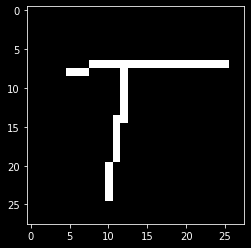

In [35]:
import cv2
img = cv2.imread('test/img.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_final = cv2.resize(img, (28,28))
plt.imshow(img_final, cmap=plt.cm.gray)
plt.show()
img_final =np.reshape(img_final, (1,28,28,1))

In [36]:
img_pred = chr(labels_dict[np.argmax(cnn.predict(img_final))])
img_pred

'T'